In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import csv

## 1 bin

In [2]:
values2000_1bin=ascii.read('/home/lee/data/2000stars_only/values2000_1bin_2week') 
burst_total2000_1bin=values2000_1bin['burst_total'] 
burst_num2000_1bin=values2000_1bin['burst_number']

In [5]:
burst2000_1bin=np.load('/home/lee/data/2000stars_only/burst2000_1.npy')
L2000_1bin=np.load('/home/lee/data/2000stars_only/L2000_1.npy')
C2000_1bin=np.load('/home/lee/data/2000stars_only/C2000_1.npy')

In [8]:
run=50
stars=2000
cadence=26
time=300
steps=cadence*time

In [13]:
num0_1bin=0
num100_1bin=0
num100_list_1bin=[]
num0_list_1bin=[]

for i in range(run):
    for j in range(stars):
        for k in range(steps):
            if C2000_1bin[i,j,k]==0:
                num0_1bin+=1
            elif C2000_1bin[i,j,k]==100:
                num100_1bin+=1
    num100_list_1bin.append(num100_1bin)
    num0_list_1bin.append(num0_1bin)
    num100_1bin=0
    num0_1bin=0

In [14]:
print(num100_list_1bin)

[135195, 147262, 151044, 141874, 137460, 154645, 137505, 137955, 146851, 155585, 126600, 140189, 140903, 144471, 144884, 140975, 139799, 164155, 144463, 146656, 151797, 142159, 129828, 153040, 140231, 133978, 157657, 135373, 138146, 128318, 160250, 154547, 137397, 156865, 152988, 132050, 157591, 150110, 148677, 151157, 126651, 151580, 135766, 134576, 128202, 151681, 138166, 149894, 140775, 148475]


In [25]:
num100_final_1bin=[]
for i in range(run):
    num100_final_1bin.append(num100_list_1bin[i]*100)
    
num0_final_1bin=[]
for i in range(run):
    num0_final_1bin.append(num0_list_1bin[i]*1)

In [26]:
number100_1bin=np.sum(num100_final_1bin)
number0_1bin=np.sum(num0_final_1bin)
total_1bin=number100_1bin+number0_1bin

y01=number0_1bin/total_1bin
y51=number100_1bin/total_1bin

print(y01,y51)

0.5178110643867423 0.4821889356132577


/tmp/ipykernel_70205/3139982042.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','S.S.','100x'])


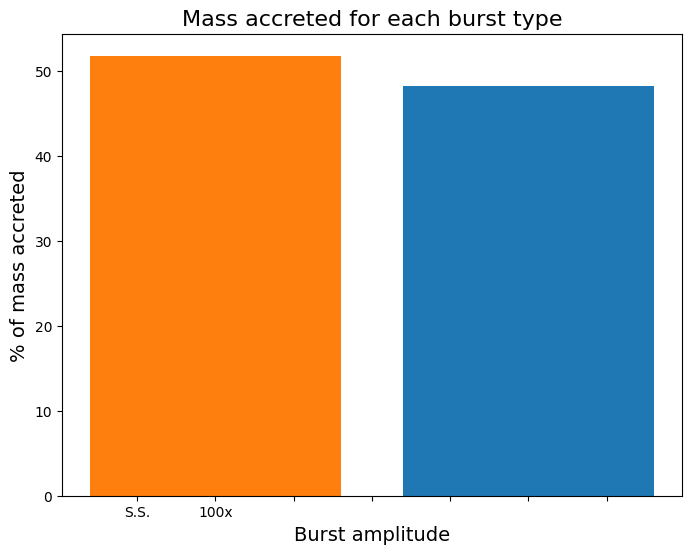

In [27]:
y1=[y01*100,y51*100]
x1=[1,2]
fig,ax=plt.subplots()
fig.set_size_inches(8,6)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

ax.bar(x1[1],y1[1],label='100x burst')
ax.bar(x1[0],y1[0],label='steady state')
ax.set_xticklabels(['0','S.S.','100x'])
ax.set_ylabel('% of mass accreted',fontsize=14)
ax.set_xlabel('Burst amplitude',fontsize=14)
plt.title('Mass accreted for each burst type',fontsize=16)
#plt.savefig('/Users/rachellee/Desktop/research/figs/size2000/percent_mass_1bins.jpeg',dpi=300,bbox_inches='tight')
plt.show()

In [28]:
num100_total_1bin=[]
num0_total_1bin=[]
for i in range(run):
    total1=num100_final_1bin[i]+num0_final_1bin[i]
    num100_total_1bin.append(100*num100_final_1bin[i]/total1)
    num0_total_1bin.append(100*num0_final_1bin[i]/total1)
    
print(num100_total_1bin)

[46.644209685207215, 48.796283023610705, 49.436140501226774, 47.85679970731503, 47.06157856572085, 50.03096908736712, 47.069805749119524, 47.15193978168708, 48.7257902740136, 50.18399076344918, 44.9998933651816, 47.55601423685045, 47.68388336316981, 48.313812140063, 48.385767389507635, 47.696743781618444, 47.48591045934251, 51.53785499482047, 48.312416391006344, 48.692278188770494, 49.56166930527369, 47.907340028343576, 45.62897682533831, 49.76755197236119, 47.56355292288549, 46.417276270620015, 50.518066768877496, 46.67724320525323, 47.18672555084711, 45.336471321797084, 50.93000897830112, 50.01496270908432, 47.05005629179315, 50.39088958158359, 49.7589720512179, 46.053859125063866, 50.50749308310697, 49.27958441135502, 49.03753000220357, 49.4550172073569, 45.0099435118119, 49.52555705633001, 46.750034795832654, 46.52902130842197, 45.31387284842873, 49.542371366161404, 47.19036544099319, 49.24324330361998, 47.66100507080592, 49.00322700152893]


/tmp/ipykernel_70205/1368110062.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


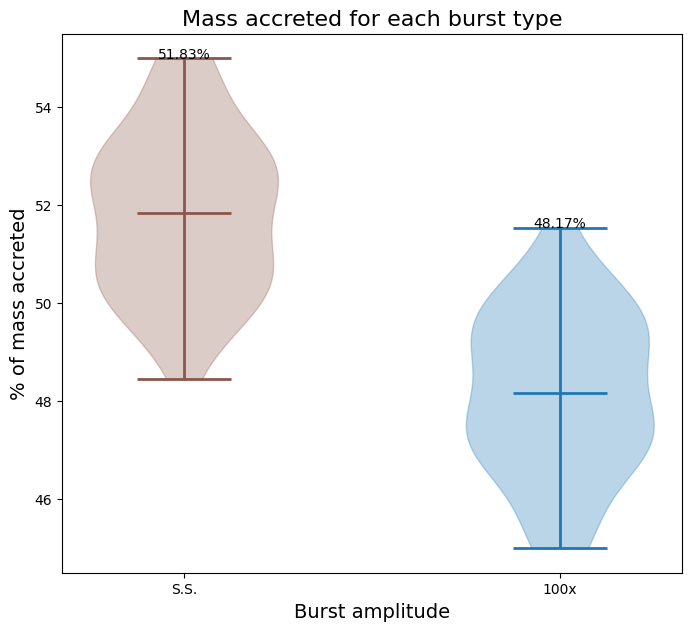

In [29]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(num100_total_1bin,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(num0_total_1bin,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(num0_total_1bin))
string100='{:.2f}%'.format(np.mean(num100_total_1bin))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(num0_total_1bin),string0,ha='center')
ax1.text(2,np.max(num100_total_1bin),string100,ha='center')
plt.title('Mass accreted for each burst type',fontsize=16)
#plt.savefig('/Users/rachellee/Desktop/research/figs/size2000/percent_mass_1bins_violinplot.jpeg',dpi=300,bbox_inches='tight')
plt.show()    

## 2 bins

In [18]:
burst2000_2bin=np.load('/home/lee/data/2000stars_only/burst2000_2.npy')
L2000_2bin=np.load('/home/lee/data/2000stars_only/L2000_2.npy')
C2000_2bin=np.load('/home/lee/data/2000stars_only/C2000_2.npy')

In [19]:
num0_2bin=0
num40_2bin=0
num100_2bin=0
num0_list_2bin=[]
num40_list_2bin=[]
num100_list_2bin=[]

run=50

for i in range(run):
    for j in range(stars):
        for k in range(steps):
            if C2000_2bin[i,j,k]==0:
                num0_2bin+=1
            elif C2000_2bin[i,j,k]==40:
                num40_2bin+=1
            elif C2000_2bin[i,j,k]==100:
                num100_2bin+=1
    num0_list_2bin.append(num0_2bin)
    num40_list_2bin.append(num40_2bin)
    num100_list_2bin.append(num100_2bin)
    num0_2bin=0
    num40_2bin=0
    num100_2bin=0

In [20]:
num100_final_2bin=[]
for i in range(run):
    num100_final_2bin.append(num100_list_2bin[i]*100)
    
num40_final_2bin=[]
for i in range(run):
    num40_final_2bin.append(num40_list_2bin[i]*40)
    
num0_final_2bin=[]
for i in range(run):
    num0_final_2bin.append(num0_list_2bin[i]*1)

In [21]:
number0_2bin=np.sum(num0_final_2bin)
number40_2bin=np.sum(num40_final_2bin)
number100_2bin=np.sum(num100_final_2bin)
total_2bin=number100_2bin+number40_2bin+number0_2bin

y02=number0_2bin/total_2bin
y42=number40_2bin/total_2bin
y52=number100_2bin/total_2bin

print(y02,y42,y52)

0.5174241758965151 0.25601978746764037 0.22655603663584453


/tmp/ipykernel_70205/3091933114.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','40x','100x'])


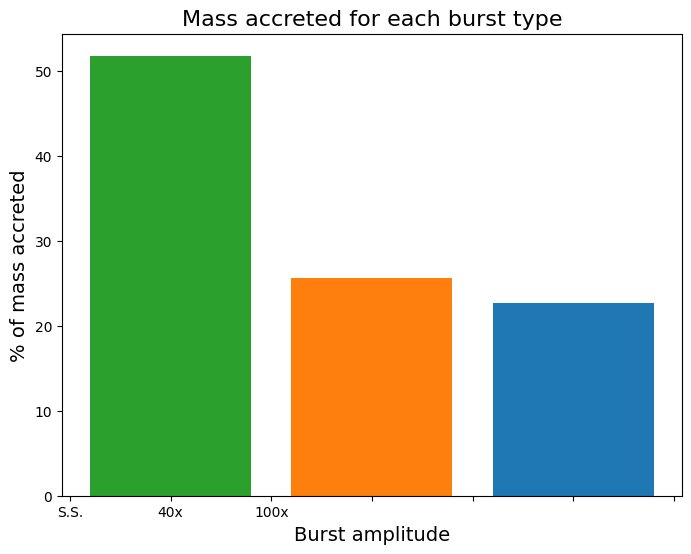

In [22]:
y2=[y02*100,y42*100,y52*100]
x2=[1,2,3]

fig,ax1=plt.subplots()
fig.set_size_inches(8,6)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

ax1.bar(x2[2],y2[2],label='100x burst')
ax1.bar(x2[1],y2[1],label='40x burst')
ax1.bar(x2[0],y2[0],label='steady state')
ax1.set_xticklabels(['0','S.S.','40x','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
plt.title('Mass accreted for each burst type',fontsize=16)
#plt.savefig('/Users/rachellee/Desktop/research/figs/size2000/percent_mass_2bins.jpeg',dpi=300,bbox_inches='tight')
plt.show()

In [23]:
num100_total_2bin=[]
num40_total_2bin=[]
num0_total_2bin=[]
for i in range(run):
    total2=num100_final_2bin[i]+num40_final_2bin[i]+num0_final_2bin[i]
    num100_total_2bin.append(100*num100_final_2bin[i]/total2)
    num40_total_2bin.append(100*num40_final_2bin[i]/total2)
    num0_total_2bin.append(100*num0_final_2bin[i]/total2)
    
print(num0_total_2bin)

[51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151, 51.74241758965151]


/tmp/ipykernel_70205/4279444751.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','40x','100x'])


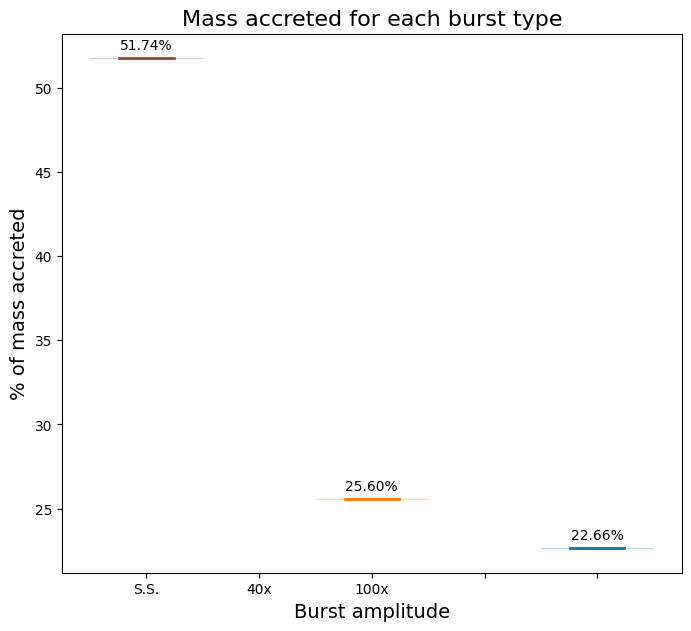

In [24]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(num100_total_2bin,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
    
v40=ax1.violinplot(num40_total_2bin,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v40['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v40[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(num0_total_2bin,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','40x','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(num0_total_2bin))
string40='{:.2f}%'.format(np.mean(num40_total_2bin))
string100='{:.2f}%'.format(np.mean(num100_total_2bin))


ax1.text(1,np.max(num0_total_2bin)+0.5,string0,ha='center')
ax1.text(2,np.max(num40_total_2bin)+0.5,string40,ha='center')
ax1.text(3,np.max(num100_total_2bin)+0.5,string100,ha='center')
plt.title('Mass accreted for each burst type',fontsize=16)
#plt.savefig('/Users/rachellee/Desktop/research/figs/size2000/percent_mass_2bins_violinplot.jpeg',dpi=300,bbox_inches='tight')
plt.show()    

## 3 bin

In [89]:
burst2000_3bin=np.load('/home/lee/data/2000stars_only/burst2000_3.npy')
L2000_3bin=np.load('/home/lee/data/2000stars_only/L2000_3.npy')
C2000_3bin=np.load('/home/lee/data/2000stars_only/C2000_3.npy')

In [90]:
num0_3bin=0
num16_3bin=0
num40_3bin=0
num100_3bin=0
num0_list_3bin=[]
num16_list_3bin=[]
num40_list_3bin=[]
num100_list_3bin=[]

for i in range(run):
    for j in range(stars):
        for k in range(steps):
            if C2000_3bin[i,j,k]==0:
                num0_3bin+=1
            elif C2000_3bin[i,j,k]==16:
                num16_3bin+=1    
            elif C2000_3bin[i,j,k]==40:
                num40_3bin+=1
            elif C2000_3bin[i,j,k]==100:
                num100_3bin+=1
    num0_list_3bin.append(num0_3bin)
    num16_list_3bin.append(num16_3bin)
    num40_list_3bin.append(num40_3bin)
    num100_list_3bin.append(num100_3bin)
    num0_3bin=0
    num16_3bin=0
    num40_3bin=0
    num100_3bin=0

In [91]:
num100_final_3bin=[]
for i in range(run):
    num100_final_3bin.append(num100_list_3bin[i]*100)
    
num40_final_3bin=[]
for i in range(run):
    num40_final_3bin.append(num40_list_3bin[i]*40)
    
num16_final_3bin=[]
for i in range(run):
    num16_final_3bin.append(num16_list_3bin[i]*16)
    
num0_final_3bin=[]
for i in range(run):
    num0_final_3bin.append(num0_list_3bin[i]*1)

In [92]:
number0_3bin=np.sum(num0_final_3bin)
number40_3bin=np.sum(num40_final_3bin)
number16_3bin=np.sum(num16_final_3bin)
number100_3bin=np.sum(num100_final_3bin)
total_3bin=number100_3bin+number40_3bin+number16_3bin+number0_3bin

y03=number0_3bin/total_3bin
y33=number16_3bin/total_3bin
y43=number40_3bin/total_3bin
y53=number100_3bin/total_3bin

print(y03,y33,y43,y53)

0.5028554022994982 0.16788251954217212 0.16679294843076534 0.16246912972756428


In [93]:
num100_total_3bin=[]
num40_total_3bin=[]
num16_total_3bin=[]
num0_total_3bin=[]
for i in range(run):
    num100_total_3bin.append(num100_final_3bin[i]/total_3bin)
    num40_total_3bin.append(num40_final_3bin[i]/total_3bin)
    num16_total_3bin.append(num16_final_3bin[i]/total_3bin)
    num0_total_3bin.append(num0_final_3bin[i]/total_3bin)
print(np.sum(num100_total_3bin))

0.16246912972756428


<ipython-input-94-04992a4552be>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','S.S.','16x','40x','100x'])


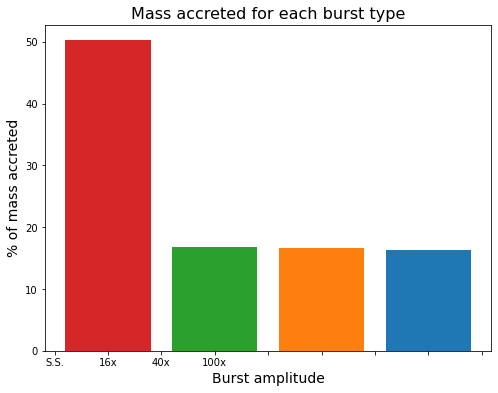

In [94]:
y3=[y03*100,y33*100,y43*100,y53*100]
x3=[1,2,3,4]
fig,ax=plt.subplots()
fig.set_size_inches(8,6)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

ax.bar(x3[3],y3[3],label='100x burst')
ax.bar(x3[2],y3[2],label='40x burst')
ax.bar(x3[1],y3[1],label='16x burst')
ax.bar(x3[0],y3[0],label='steady state')
ax.set_xticklabels(['0','S.S.','16x','40x','100x'])
ax.set_ylabel('% of mass accreted',fontsize=14)
ax.set_xlabel('Burst amplitude',fontsize=14)
plt.title('Mass accreted for each burst type',fontsize=16)
plt.savefig('/Users/rachellee/Desktop/research/figs/size2000/percent_mass_3bins.jpeg',dpi=300,bbox_inches='tight')
plt.show()

In [95]:
num100_total_3bin=[]
num40_total_3bin=[]
num16_total_3bin=[]
num0_total_3bin=[]
for i in range(run):
    total3=num100_final_3bin[i]+num40_final_3bin[i]+num16_final_3bin[i]+num0_final_3bin[i]
    num100_total_3bin.append(100*num100_final_3bin[i]/total3)
    num40_total_3bin.append(100*num40_final_3bin[i]/total3)
    num16_total_3bin.append(100*num16_final_3bin[i]/total3)
    num0_total_3bin.append(100*num0_final_3bin[i]/total3)
    
print(num0_total_3bin)

[50.215539926319316, 48.960427637603715, 49.752953046800435, 47.78326951218555, 48.70705540891565, 50.99111463327493, 51.07623319900989, 51.06673925501278, 48.77118101365819, 51.18423290005703, 51.1477458122605, 49.2782013805047, 47.54052979988927, 50.63326904323314, 50.14061672568356, 49.46362462231687, 50.72185864364227, 50.67619889548563, 50.129738248812586, 49.02273549135828, 51.06289134239543, 50.317277529284986, 50.84021458081712, 49.85544736671463, 51.59830720902152, 51.23509666694386, 49.38806974321059, 50.161170719895885, 49.93949465843535, 51.10164615923337, 49.9437055641353, 49.55523103699695, 49.204349582982175, 49.820478749058765, 49.14232862774923, 51.885248289457664, 51.45229142096087, 53.39983189490116, 50.9673609348803, 49.26768201860929, 50.626175551057194, 51.87306359044476, 50.660062089569216, 48.9075433028001, 50.76746109643863, 50.870385434480504, 51.445398041985854, 51.30935503442811, 52.23463912869162, 49.42177897987671]


<ipython-input-98-7db10e711fd9>:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','16x','40x','100x'])


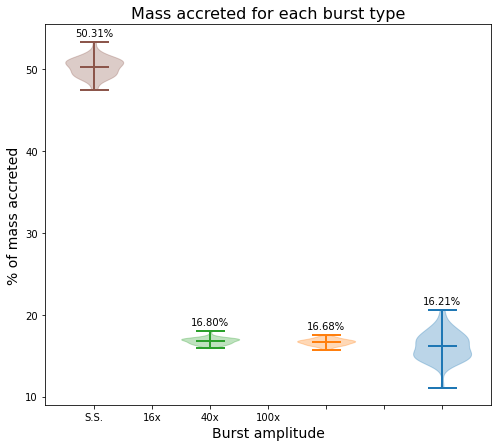

In [98]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(num100_total_3bin,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
    
v40=ax1.violinplot(num40_total_3bin,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v40['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v40[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2)

v16=ax1.violinplot(num16_total_3bin,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v16['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v16[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2)

v0=ax1.violinplot(num0_total_3bin,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','16x','40x','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(num0_total_3bin))
string16='{:.2f}%'.format(np.mean(num16_total_3bin))
string40='{:.2f}%'.format(np.mean(num40_total_3bin))
string100='{:.2f}%'.format(np.mean(num100_total_3bin))


ax1.text(1,np.max(num0_total_3bin)+0.7,string0,ha='center')
ax1.text(2,np.max(num16_total_3bin)+0.7,string16,ha='center')
ax1.text(3,np.max(num40_total_3bin)+0.7,string40,ha='center')
ax1.text(4,np.max(num100_total_3bin)+0.7,string100,ha='center')
plt.title('Mass accreted for each burst type',fontsize=16)
plt.savefig('/Users/rachellee/Desktop/research/figs/size2000/percent_mass_3bins_violinplot.jpeg',dpi=300,bbox_inches='tight')
plt.show()  

## 4 bins

In [99]:
burst2000_4bin=np.load('/home/lee/data/2000stars_only/burst2000_4.npy')
L2000_4bin=np.load('/home/lee/data/2000stars_only/L2000_4.npy')
C2000_4bin=np.load('/home/lee/data/2000stars_only/C2000_4.npy')

In [100]:
num0_4bin=0
num3_4bin=0
num16_4bin=0
num40_4bin=0
num100_4bin=0
num0_list_4bin=[]
num3_list_4bin=[]
num16_list_4bin=[]
num40_list_4bin=[]
num100_list_4bin=[]

for i in range(run):
    for j in range(stars):
        for k in range(steps):
            if C2000_4bin[i,j,k]==0:
                num0_4bin+=1
            elif C2000_4bin[i,j,k]==3:
                num3_4bin+=1
            elif C2000_4bin[i,j,k]==16:
                num16_4bin+=1    
            elif C2000_4bin[i,j,k]==40:
                num40_4bin+=1
            elif C2000_4bin[i,j,k]==100:
                num100_4bin+=1
    num0_list_4bin.append(num0_4bin)
    num3_list_4bin.append(num3_4bin)
    num16_list_4bin.append(num16_4bin)
    num40_list_4bin.append(num40_4bin)
    num100_list_4bin.append(num100_4bin)
    num0_4bin=0
    num3_4bin=0
    num16_4bin=0
    num40_4bin=0
    num100_4bin=0

In [101]:
num100_final_4bin=[]
for i in range(run):
    num100_final_4bin.append(num100_list_4bin[i]*100)
    
num40_final_4bin=[]
for i in range(run):
    num40_final_4bin.append(num40_list_4bin[i]*40)
    
num16_final_4bin=[]
for i in range(run):
    num16_final_4bin.append(num16_list_4bin[i]*16)
    
num3_final_4bin=[]
for i in range(run):
    num3_final_4bin.append(num3_list_4bin[i]*3)
    
num0_final_4bin=[]
for i in range(run):
    num0_final_4bin.append(num0_list_4bin[i]*1)

In [102]:
number0_4bin=np.sum(num0_final_4bin)
number3_4bin=np.sum(num3_final_4bin)
number40_4bin=np.sum(num40_final_4bin)
number16_4bin=np.sum(num16_final_4bin)
number100_4bin=np.sum(num100_final_4bin)
total_4bin=number100_4bin+number40_4bin+number16_4bin+number3_4bin+number0_4bin

print(number0_4bin/total_4bin)
print(number3_4bin/total_4bin)
print(number16_4bin/total_4bin)
print(number40_4bin/total_4bin)
print(number100_4bin/total_4bin)

0.4872107011252942
0.12730532812928616
0.13263881383257262
0.1319285360347542
0.12091662087809281


In [103]:
num100_total_4bin=[]
num40_total_4bin=[]
num16_total_4bin=[]
num3_total_4bin=[]
num0_total_4bin=[]
for i in range(run):
    num100_total_4bin.append(num100_final_4bin[i]/total_4bin)
    num40_total_4bin.append(num40_final_4bin[i]/total_4bin)
    num16_total_4bin.append(num16_final_4bin[i]/total_4bin)
    num3_total_4bin.append(num3_final_4bin[i]/total_4bin)
    num0_total_4bin.append(num0_final_4bin[i]/total_4bin)
print(np.sum(num0_total_4bin))

0.4872107011252942


Text(0.5, 1.0, 'Mass accreted for each burst type')

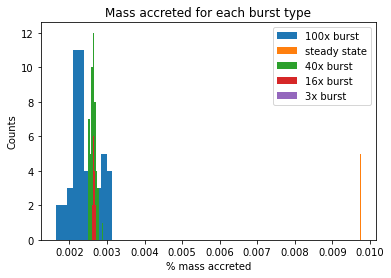

In [104]:
plt.hist(num100_total_4bin,label='100x burst')
plt.hist(num0_total_4bin,label='steady state')
plt.hist(num40_total_4bin,label='40x burst')
plt.hist(num16_total_4bin,label='16x burst')
plt.hist(num3_total_4bin,label='3x burst')
plt.legend(loc='upper right')
plt.xlabel('% mass accreted')
plt.ylabel('Counts')
plt.title('Mass accreted for each burst type')

In [105]:
number0_4bin=np.sum(num0_final_4bin)
number3_4bin=np.sum(num3_final_4bin)
number40_4bin=np.sum(num40_final_4bin)
number16_4bin=np.sum(num16_final_4bin)
number100_4bin=np.sum(num100_final_4bin)
total_4bin=number100_4bin+number40_4bin+number16_4bin+number3_4bin+number0_4bin

y04=number0_4bin/total_4bin
y14=number3_4bin/total_4bin
y34=number16_4bin/total_4bin
y44=number40_4bin/total_4bin
y54=number100_4bin/total_4bin

print(y04,y14,y34,y44,y54)

0.4872107011252942 0.12730532812928616 0.13263881383257262 0.1319285360347542 0.12091662087809281


<ipython-input-106-b1ebf7a37aa2>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','S.S.','3x','16x','40x','100x'])


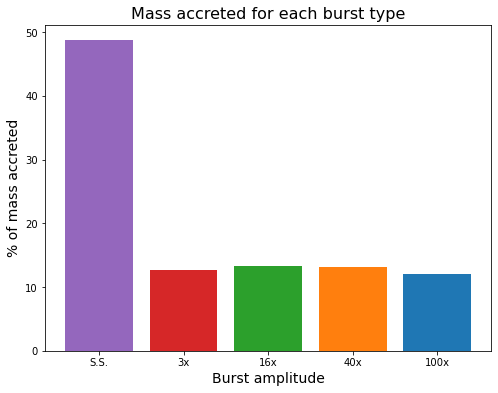

In [106]:
y4=[y04*100,y14*100,y34*100,y44*100,y54*100]
x4=[1,2,3,4,5,6]
fig,ax=plt.subplots()
fig.set_size_inches(8,6)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

ax.bar(x4[4],y4[4],label='100x burst')
ax.bar(x4[3],y4[3],label='40x burst')
ax.bar(x4[2],y4[2],label='16x burst')
ax.bar(x4[1],y4[1],label='3x burst')
ax.bar(x4[0],y4[0],label='steady state')
ax.set_xticklabels(['0','S.S.','3x','16x','40x','100x'])
ax.set_ylabel('% of mass accreted',fontsize=14)
ax.set_xlabel('Burst amplitude',fontsize=14)
plt.title('Mass accreted for each burst type',fontsize=16)
plt.savefig('/Users/rachellee/Desktop/research/figs/size2000/percent_mass_4bins.jpeg',dpi=300,bbox_inches='tight')
plt.show()

In [107]:
num100_total_4bin=[]
num40_total_4bin=[]
num16_total_4bin=[]
num3_total_4bin=[]
num0_total_4bin=[]
for i in range(run):
    total4=num100_final_4bin[i]+num40_final_4bin[i]+num16_final_4bin[i]+num3_final_4bin[i]+num0_final_4bin[i]
    num100_total_4bin.append(100*num100_final_4bin[i]/total4)
    num40_total_4bin.append(100*num40_final_4bin[i]/total4)
    num16_total_4bin.append(100*num16_final_4bin[i]/total4)
    num3_total_4bin.append(100*num3_final_4bin[i]/total4)
    num0_total_4bin.append(100*num0_final_4bin[i]/total4)
    
print(num0_total_4bin)

[49.4627675634319, 49.699923682040385, 48.3101763987933, 47.10224770325288, 49.27858421462112, 48.35084483492402, 48.60387828493334, 49.67021401279193, 49.814704136648366, 47.8654921539106, 47.21241160795858, 47.522130092548004, 49.27221814857009, 48.23816331708384, 50.15378325561561, 49.065164769588044, 47.44489245995687, 49.059588731604194, 47.04756653837179, 47.718420458189904, 48.92108216378856, 48.66363127912192, 48.62730076713273, 48.29743251367181, 48.20922932096831, 48.696198867093976, 48.12417209949402, 48.734695433080965, 49.30104730148341, 48.33947873317724, 48.97740234240334, 47.575821385820355, 48.94168316109314, 47.03173503349684, 49.21502067669912, 49.15041969586996, 47.70708442708431, 49.5166295466409, 49.580197466767835, 47.92235167828213, 49.23521127824422, 48.469434053492684, 49.974822188390355, 49.585437763663634, 49.3261875308469, 49.589961063843305, 49.22618153144637, 49.18282968518619, 50.36239555912668, 49.40544199430265]


<ipython-input-108-0fc8f4dc96d9>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','3x','16x','40x','100x'])


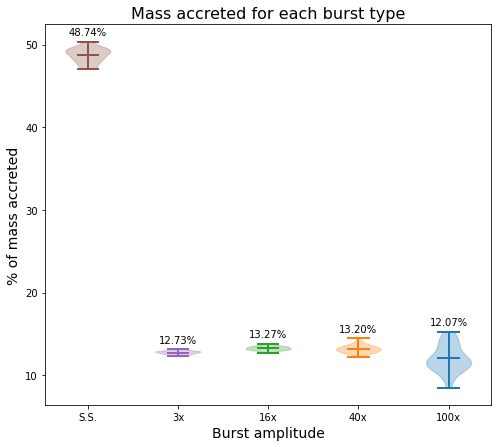

In [108]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(num100_total_4bin,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
    
v40=ax1.violinplot(num40_total_4bin,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v40['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v40[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2)

v16=ax1.violinplot(num16_total_4bin,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v16['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v16[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2)

v3=ax1.violinplot(num3_total_4bin,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v3['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v3[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(num0_total_4bin,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','3x','16x','40x','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(num0_total_4bin))
string3='{:.2f}%'.format(np.mean(num3_total_4bin))
string16='{:.2f}%'.format(np.mean(num16_total_4bin))
string40='{:.2f}%'.format(np.mean(num40_total_4bin))
string100='{:.2f}%'.format(np.mean(num100_total_4bin))


ax1.text(1,np.max(num0_total_4bin)+0.75,string0,ha='center')
ax1.text(2,np.max(num3_total_4bin)+0.75,string3,ha='center')
ax1.text(3,np.max(num16_total_4bin)+0.75,string16,ha='center')
ax1.text(4,np.max(num40_total_4bin)+0.75,string40,ha='center')
ax1.text(5,np.max(num100_total_4bin)+0.75,string100,ha='center')
plt.title('Mass accreted for each burst type',fontsize=16)
plt.savefig('/Users/rachellee/Desktop/research/figs/size2000/percent_mass_4bins_violinplot.jpeg',dpi=300,bbox_inches='tight')
plt.show()   

## 5 bins

In [4]:
burst2000_5bin=np.load('/home/lee/data/2000stars_only/burst2000_5.npy')
L2000_5bin=np.load('/home/lee/data/2000stars_only/L2000_5.npy')
C2000_5bin=np.load('/home/lee/data/2000stars_only/C2000_5.npy')

In [5]:
num0_5bin=0
num3_5bin=0
num6_5bin=0
num16_5bin=0
num40_5bin=0
num100_5bin=0
num0_list_5bin=[]
num3_list_5bin=[]
num6_list_5bin=[]
num16_list_5bin=[]
num40_list_5bin=[]
num100_list_5bin=[]
run=50

for i in range(run):
    for j in range(stars):
        for k in range(steps):
            if C2000_5bin[i,j,k]==0:
                num0_5bin+=1
            elif C2000_5bin[i,j,k]==3:
                num3_5bin+=1
            elif C2000_5bin[i,j,k]==6:
                num6_5bin+=1
            elif C2000_5bin[i,j,k]==16:
                num16_5bin+=1    
            elif C2000_5bin[i,j,k]==40:
                num40_5bin+=1
            elif C2000_5bin[i,j,k]==100:
                num100_5bin+=1
    num0_list_5bin.append(num0_5bin)
    num3_list_5bin.append(num3_5bin)
    num6_list_5bin.append(num6_5bin)
    num16_list_5bin.append(num16_5bin)
    num40_list_5bin.append(num40_5bin)
    num100_list_5bin.append(num100_5bin)
    num0_5bin=0
    num3_5bin=0
    num6_5bin=0
    num16_5bin=0
    num40_5bin=0
    num100_5bin=0

NameError: name 'stars' is not defined

In [5]:
num100_final_5bin=[]
for i in range(run):
    num100_final_5bin.append(num100_list_5bin[i]*100)
    
num40_final_5bin=[]
for i in range(run):
    num40_final_5bin.append(num40_list_5bin[i]*40)
    
num16_final_5bin=[]
for i in range(run):
    num16_final_5bin.append(num16_list_5bin[i]*16)
    
num6_final_5bin=[]
for i in range(run):
    num6_final_5bin.append(num6_list_5bin[i]*6)
    
num3_final_5bin=[]
for i in range(run):
    num3_final_5bin.append(num3_list_5bin[i]*3)
    
num0_final_5bin=[]
for i in range(run):
    num0_final_5bin.append(num0_list_5bin[i]*1)

In [6]:
number0_5bin=np.sum(num0_final_5bin)
number3_5bin=np.sum(num3_final_5bin)
number6_5bin=np.sum(num6_final_5bin)
number40_5bin=np.sum(num40_final_5bin)
number16_5bin=np.sum(num16_final_5bin)
number100_5bin=np.sum(num100_final_5bin)
total_5bin=number100_5bin+number40_5bin+number16_5bin+number6_5bin+number3_5bin+number0_5bin

y0=number0_5bin/total_5bin
y1=number3_5bin/total_5bin
y2=number6_5bin/total_5bin
y3=number16_5bin/total_5bin
y4=number40_5bin/total_5bin
y5=number100_5bin/total_5bin

print(y0,y1,y2,y3,y4,y5)

0.48894648082229725 0.10047316648158462 0.10394889230657048 0.10451390626780431 0.10444541066915798 0.09767214345258535


/tmp/ipykernel_141941/3413678282.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','S.S.','3x','6x','16x','40x','100x'])


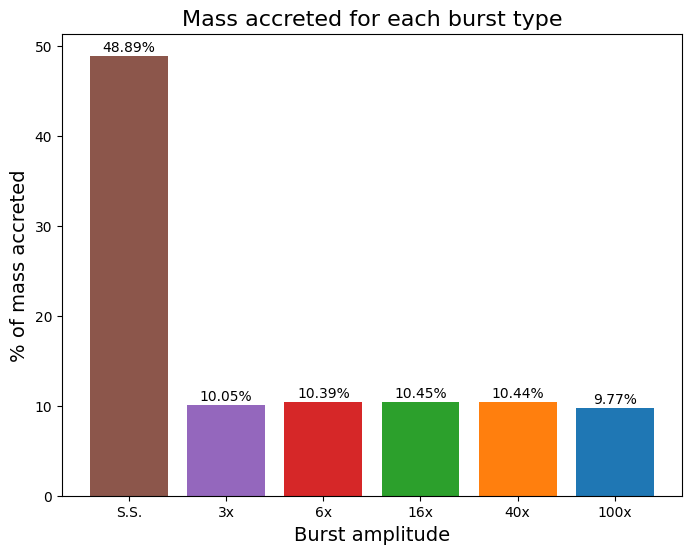

In [7]:
y=[y0*100,y1*100,y2*100,y3*100,y4*100,y5*100]
x=[1,2,3,4,5,6]
fig,ax=plt.subplots()
fig.set_size_inches(8,6)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

ax.bar(x[5],y[5],label='100x burst')
ax.bar(x[4],y[4],label='40x burst')
ax.bar(x[3],y[3],label='16x burst')
ax.bar(x[2],y[2],label='6x burst')
ax.bar(x[1],y[1],label='3x burst')
ax.bar(x[0],y[0],label='steady state')
ax.set_xticklabels(['0','S.S.','3x','6x','16x','40x','100x'])
ax.set_ylabel('% of mass accreted',fontsize=14)
ax.set_xlabel('Burst amplitude',fontsize=14)

string0='{:.2f}%'.format(y[0])
string3='{:.2f}%'.format(y[1])
string6='{:.2f}%'.format(y[2])
string16='{:.2f}%'.format(y[3])
string40='{:.2f}%'.format(y[4])
string100='{:.2f}%'.format(y[5])


ax.text(1,y[0]+0.5,string0,ha='center')
ax.text(2,y[1]+0.5,string3,ha='center')
ax.text(3,y[2]+0.5,string6,ha='center')
ax.text(4,y[3]+0.5,string16,ha='center')
ax.text(5,y[4]+0.5,string40,ha='center')
ax.text(6,y[5]+0.5,string100,ha='center')
plt.title('Mass accreted for each burst type',fontsize=16)
plt.savefig('/home/lee/research/figs/size2000/percent_mass_5bins.jpeg',dpi=300,bbox_inches='tight')
plt.show()

In [8]:
num100_total_5bin=[]
num40_total_5bin=[]
num16_total_5bin=[]
num3_total_5bin=[]
num6_total_5bin=[]
num0_total_5bin=[]
for i in range(run):
    total5=num100_final_5bin[i]+num40_final_5bin[i]+num16_final_5bin[i]+num6_final_5bin[i]+num3_final_5bin[i]+num0_final_5bin[i]
    num100_total_5bin.append(100*num100_final_5bin[i]/total5)
    num40_total_5bin.append(100*num40_final_5bin[i]/total5)
    num16_total_5bin.append(100*num16_final_5bin[i]/total5)
    num3_total_5bin.append(100*num3_final_5bin[i]/total5)
    num6_total_5bin.append(100*num6_final_5bin[i]/total5)
    num0_total_5bin.append(100*num0_final_5bin[i]/total5)

In [9]:
mean0=np.mean(num0_total_5bin)
std0=np.std(num0_total_5bin)
mean3=np.mean(num3_total_5bin)
std3=np.std(num3_total_5bin)
mean6=np.mean(num6_total_5bin)
std6=np.std(num6_total_5bin)
mean16=np.mean(num16_total_5bin)
std16=np.std(num16_total_5bin)
mean40=np.mean(num40_total_5bin)
std40=np.std(num40_total_5bin)
mean100=np.mean(num100_total_5bin)
std100=np.std(num100_total_5bin)

/tmp/ipykernel_141941/4004211886.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','3x','6x','16x','40x','100x'])


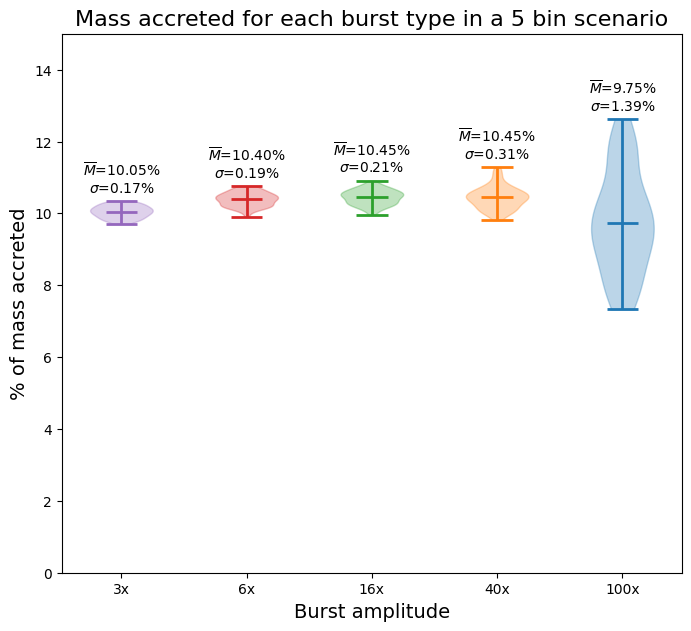

In [33]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(num100_total_5bin,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
    
v40=ax1.violinplot(num40_total_5bin,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v40['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v40[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2)

v16=ax1.violinplot(num16_total_5bin,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v16['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v16[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2)
    
v6=ax1.violinplot(num6_total_5bin,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v6['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v6[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2)

v3=ax1.violinplot(num3_total_5bin,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v3['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v3[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)
    
#v0=ax1.violinplot(num0_total_5bin,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
#for pc in v0['bodies']:
#    pc.set_facecolor('#8c564b')
#    pc.set_edgecolor('#8c564b')
#    pc.set_alpha(0.3)
#for partname in ('cbars','cmins','cmaxes','cmeans',):
#    vp=v0[partname]
#    vp.set_edgecolor('#8c564b')
#    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','3x','6x','16x','40x','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0mean='{:.2f}%'.format(np.mean(num0_total_5bin))
string0std='{:.2f}%'.format(np.std(num0_total_5bin))
string3mean='{:.2f}%'.format(np.mean(num3_total_5bin))
string3std='{:.2f}%'.format(np.std(num3_total_5bin))
string6mean='{:.2f}%'.format(np.mean(num6_total_5bin))
string6std='{:.2f}%'.format(np.std(num6_total_5bin))
string16mean='{:.2f}%'.format(np.mean(num16_total_5bin))
string16std='{:.2f}%'.format(np.std(num16_total_5bin))
string40mean='{:.2f}%'.format(np.mean(num40_total_5bin))
string40std='{:.2f}%'.format(np.std(num40_total_5bin))
string100mean='{:.2f}%'.format(np.mean(num100_total_5bin))
string100std='{:.2f}%'.format(np.std(num100_total_5bin))

ax1.set_ylim(0,15)
#ax1.text(1,np.min(num0_total_5bin)-2,'$\overline{M}$='+string0mean,ha='center')
#ax1.text(1,np.min(num0_total_5bin)-3.75,'$\sigma$='+string0std,ha='center')
ax1.text(1,np.max(num3_total_5bin)+0.7,'$\overline{M}$='+string3mean,ha='center')
ax1.text(1,np.max(num3_total_5bin)+0.25,'$\sigma$='+string3std,ha='center')
ax1.text(2,np.max(num6_total_5bin)+0.7,'$\overline{M}$='+string6mean,ha='center')
ax1.text(2,np.max(num6_total_5bin)+0.25,'$\sigma$='+string6std,ha='center')
ax1.text(3,np.max(num16_total_5bin)+0.7,'$\overline{M}$='+string16mean,ha='center')
ax1.text(3,np.max(num16_total_5bin)+0.25,'$\sigma$='+string16std,ha='center')
ax1.text(4,np.max(num40_total_5bin)+0.7,'$\overline{M}$='+string40mean,ha='center')
ax1.text(4,np.max(num40_total_5bin)+0.25,'$\sigma$='+string40std,ha='center')
ax1.text(5,np.max(num100_total_5bin)+0.7,'$\overline{M}$='+string100mean,ha='center')
ax1.text(5,np.max(num100_total_5bin)+0.25,'$\sigma$='+string100std,ha='center')
plt.title('Mass accreted for each burst type in a 5 bin scenario',fontsize=16)
plt.savefig('/home/lee/research/figs/size2000/percent_mass_5bins_violinplot.jpeg',dpi=300,bbox_inches='tight')
plt.show()    

## 1000 stars, 5 bins

In [2]:
burst1000_5bin=np.load('/home/lee/data/1000stars_only/burst1000_5.npy')
L1000_5bin=np.load('/home/lee/data/1000stars_only/L1000_5.npy')
C1000_5bin=np.load('/home/lee/data/1000stars_only/C1000_5.npy')

In [7]:
num0_5bin1000=0
num3_5bin1000=0
num6_5bin1000=0
num16_5bin1000=0
num40_5bin1000=0
num100_5bin1000=0
num0_list_5bin1000=[]
num3_list_5bin1000=[]
num6_list_5bin1000=[]
num16_list_5bin1000=[]
num40_list_5bin1000=[]
num100_list_5bin1000=[]
run=50
stars1000=1000

for i in range(run):
    for j in range(stars1000):
        for k in range(steps):
            if C1000_5bin[i,j,k]==0:
                num0_5bin1000+=1
            elif C1000_5bin[i,j,k]==3:
                num3_5bin1000+=1
            elif C1000_5bin[i,j,k]==6:
                num6_5bin1000+=1
            elif C1000_5bin[i,j,k]==16:
                num16_5bin1000+=1    
            elif C1000_5bin[i,j,k]==40:
                num40_5bin1000+=1
            elif C1000_5bin[i,j,k]==100:
                num100_5bin1000+=1
    num0_list_5bin1000.append(num0_5bin1000)
    num3_list_5bin1000.append(num3_5bin1000)
    num6_list_5bin1000.append(num6_5bin1000)
    num16_list_5bin1000.append(num16_5bin1000)
    num40_list_5bin1000.append(num40_5bin1000)
    num100_list_5bin1000.append(num100_5bin1000)
    num0_5bin1000=0
    num3_5bin1000=0
    num6_5bin1000=0
    num16_5bin1000=0
    num40_5bin1000=0
    num100_5bin1000=0

In [8]:
num100_final_5bin1000=[]
for i in range(run):
    num100_final_5bin1000.append(num100_list_5bin1000[i]*100)
    
num40_final_5bin1000=[]
for i in range(run):
    num40_final_5bin1000.append(num40_list_5bin1000[i]*40)
    
num16_final_5bin1000=[]
for i in range(run):
    num16_final_5bin1000.append(num16_list_5bin1000[i]*16)
    
num6_final_5bin1000=[]
for i in range(run):
    num6_final_5bin1000.append(num6_list_5bin1000[i]*6)
    
num3_final_5bin1000=[]
for i in range(run):
    num3_final_5bin1000.append(num3_list_5bin1000[i]*3)
    
num0_final_5bin1000=[]
for i in range(run):
    num0_final_5bin1000.append(num0_list_5bin1000[i]*1)

In [9]:
number0_5bin1000=np.sum(num0_final_5bin1000)
number3_5bin1000=np.sum(num3_final_5bin1000)
number6_5bin1000=np.sum(num6_final_5bin1000)
number40_5bin1000=np.sum(num40_final_5bin1000)
number16_5bin1000=np.sum(num16_final_5bin1000)
number100_5bin1000=np.sum(num100_final_5bin1000)
total_5bin1000=number100_5bin1000+number40_5bin1000+number16_5bin1000+number6_5bin1000+\
number3_5bin1000+number0_5bin1000

y0_1000=number0_5bin1000/total_5bin1000
y1_1000=number3_5bin1000/total_5bin1000
y2_1000=number6_5bin1000/total_5bin1000
y3_1000=number16_5bin1000/total_5bin1000
y4_1000=number40_5bin1000/total_5bin1000
y5_1000=number100_5bin1000/total_5bin1000

print(y0_1000,y1_1000,y2_1000,y3_1000,y4_1000,y5_1000)

0.49126731555843406 0.10093722064011888 0.10447367477575745 0.10499720074396197 0.10479347116856938 0.09353111711315826


<ipython-input-11-440f73b55330>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','S.S.','3x','6x','16x','40x','100x'])


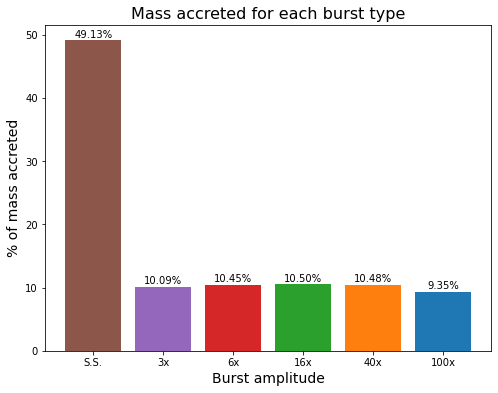

In [11]:
y1000=[y0_1000*100,y1_1000*100,y2_1000*100,y3_1000*100,y4_1000*100,y5_1000*100]
x1000=[1,2,3,4,5,6]
fig,ax=plt.subplots()
fig.set_size_inches(8,6)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

ax.bar(x1000[5],y1000[5],label='100x burst')
ax.bar(x1000[4],y1000[4],label='40x burst')
ax.bar(x1000[3],y1000[3],label='16x burst')
ax.bar(x1000[2],y1000[2],label='6x burst')
ax.bar(x1000[1],y1000[1],label='3x burst')
ax.bar(x1000[0],y1000[0],label='steady state')
ax.set_xticklabels(['0','S.S.','3x','6x','16x','40x','100x'])
ax.set_ylabel('% of mass accreted',fontsize=14)
ax.set_xlabel('Burst amplitude',fontsize=14)

string0='{:.2f}%'.format(y1000[0])
string3='{:.2f}%'.format(y1000[1])
string6='{:.2f}%'.format(y1000[2])
string16='{:.2f}%'.format(y1000[3])
string40='{:.2f}%'.format(y1000[4])
string100='{:.2f}%'.format(y1000[5])


ax.text(1,y1000[0]+0.5,string0,ha='center')
ax.text(2,y1000[1]+0.5,string3,ha='center')
ax.text(3,y1000[2]+0.5,string6,ha='center')
ax.text(4,y1000[3]+0.5,string16,ha='center')
ax.text(5,y1000[4]+0.5,string40,ha='center')
ax.text(6,y1000[5]+0.5,string100,ha='center')
plt.title('Mass accreted for each burst type',fontsize=16)
plt.savefig('/home/lee/research/figs/size1000/percent_mass1000_5bins.jpeg',dpi=300,bbox_inches='tight')
plt.show()

# 1 bin (Total)

## 50 stars

In [3]:
burst50=np.load('/home/lee/data/cluster_size_change/100x_burst/burst50.npy')
L50=np.load('/home/lee/data/cluster_size_change/100x_burst/L50.npy')
C50=np.load('/home/lee/data/cluster_size_change/100x_burst/C50.npy')

In [4]:
num0_50=0
num0_list_50=[]
num100_50=0
num100_list_50=[]
stars50=50

for i in range(run):
    for j in range(stars50):
        for k in range(steps):
            if C50[i,j,k]==0:
                num0_50+=1
            elif C50[i,j,k]==100:
                num100_50+=1
    num0_list_50.append(num0_50)
    num0_50=0
    num100_list_50.append(num100_50)
    num100_50=0

In [5]:
num100_final_50=[]
for i in range(run):
    num100_final_50.append(num100_list_50[i]*100)
    
num0_final_50=[]
for i in range(run):
    num0_final_50.append(num0_list_50[i]*1)

In [6]:
num100_total_50=[]
num0_total_50=[]
for i in range(run):
    total1_50=num100_final_50[i]+num0_final_50[i]
    num100_total_50.append(100*num100_final_50[i]/total1_50)
    num0_total_50.append(100*num0_final_50[i]/total1_50)
    
print(num100_total_50)

[44.642857142857146, 35.95239156894123, 61.919504643962846, 58.6756077116513, 50.25125628140704, 52.971992156633206, 50.25125628140704, 50.25125628140704, 66.58925152842473, 44.642857142857146, 54.844606946983546, 58.6756077116513, 37.641154328732746, 54.844606946983546, 31.13109650639917, 42.97396958969214, 54.844606946983546, 28.653295128939828, 58.841600808389614, 50.25125628140704, 58.6756077116513, 54.844606946983546, 50.25125628140704, 27.039206849932402, 37.641154328732746, 58.6756077116513, 50.30946304397348, 50.25125628140704, 28.653295128939828, 58.6756077116513, 10.376188602757628, 40.61319951981676, 50.25125628140704, 44.642857142857146, 37.641154328732746, 28.653295128939828, 54.844606946983546, 45.445697891895094, 16.69449081803005, 54.37388348859427, 65.11758429889035, 55.02599552228004, 57.8162707902288, 28.653295128939828, 54.844606946983546, 37.641154328732746, 28.653295128939828, 58.6756077116513, 41.20324403433502, 64.70165348670021]


<ipython-input-7-3bcb33762c64>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


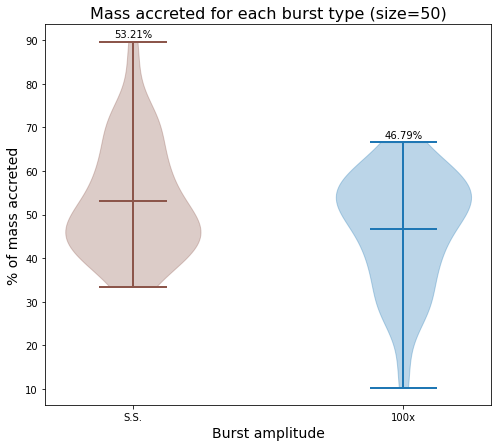

In [7]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(num100_total_50,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(num0_total_50,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(num0_total_50))
string100='{:.2f}%'.format(np.mean(num100_total_50))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(num0_total_50)+1,string0,ha='center')
ax1.text(2,np.max(num100_total_50)+1,string100,ha='center')
plt.title('Mass accreted for each burst type (size=50)',fontsize=16)
plt.show()    

## 100 stars

In [8]:
burst100=np.load('/home/lee/data/cluster_size_change/100x_burst/burst100.npy')
L100=np.load('/home/lee/data/cluster_size_change/100x_burst/L100.npy')
C100=np.load('/home/lee/data/cluster_size_change/100x_burst/C100.npy')

In [9]:
num0_100=0
num0_list_100=[]
num100_100=0
num100_list_100=[]
stars100=100

for i in range(run):
    for j in range(stars100):
        for k in range(steps):
            if C100[i,j,k]==0:
                num0_100+=1
            elif C100[i,j,k]==100:
                num100_100+=1
    num0_list_100.append(num0_100)
    num0_100=0
    num100_list_100.append(num100_100)
    num100_100=0

In [10]:
num100_final_100=[]
for i in range(run):
    num100_final_100.append(num100_list_100[i]*100)
    
num0_final_100=[]
for i in range(run):
    num0_final_100.append(num0_list_100[i]*1)

In [11]:
num100_total_100=[]
num0_total_100=[]
for i in range(run):
    total1_100=num100_final_100[i]+num0_final_100[i]
    num100_total_100.append(100*num100_final_100[i]/total1_100)
    num0_total_100.append(100*num0_final_100[i]/total1_100)
    
print(num100_total_100)

[51.734662223689874, 39.19648769343263, 9.099181073703367, 52.50647789205791, 55.47329155786434, 37.641154328732746, 49.588761795115786, 33.44481605351171, 47.59386567953464, 54.844606946983546, 50.25125628140704, 50.58892419340904, 39.273210530109985, 52.65677357587362, 37.82228338802968, 45.066826285739445, 55.6497828933051, 54.844606946983546, 48.710156645172596, 60.36217303822938, 56.84302579798863, 28.922016690775973, 60.26227432678165, 41.34672179562906, 54.844606946983546, 56.84302579798863, 57.485551272405054, 43.93133266103325, 41.34672179562906, 50.25125628140704, 54.844606946983546, 54.844606946983546, 53.988113782068496, 54.310942146369854, 46.192027752788114, 40.45695453818817, 52.65677357587362, 39.37362069113886, 44.642857142857146, 63.3619083115915, 52.40872886625411, 47.59386567953464, 55.229678180354966, 41.34672179562906, 59.67389741797856, 44.642857142857146, 44.642857142857146, 33.44481605351171, 53.19997839717998, 51.21982817185342]


<ipython-input-12-57bf79322dcd>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


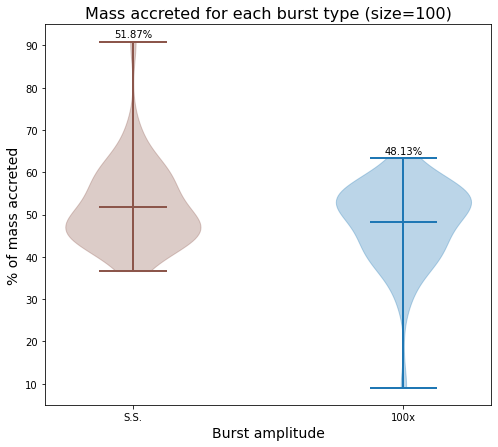

In [12]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(num100_total_100,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(num0_total_100,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(num0_total_100))
string100='{:.2f}%'.format(np.mean(num100_total_100))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(num0_total_100)+1,string0,ha='center')
ax1.text(2,np.max(num100_total_100)+1,string100,ha='center')
plt.title('Mass accreted for each burst type (size=100)',fontsize=16)
plt.show()    

## 500 stars

In [13]:
burst500=np.load('/home/lee/data/cluster_size_change/100x_burst/burst500.npy')
L500=np.load('/home/lee/data/cluster_size_change/100x_burst/L500.npy')
C500=np.load('/home/lee/data/cluster_size_change/100x_burst/C500.npy')

In [14]:
num0_500=0
num0_list_500=[]
num100_500=0
num100_list_500=[]
stars500=500

for i in range(run):
    for j in range(stars500):
        for k in range(steps):
            if C500[i,j,k]==0:
                num0_500+=1
            elif C500[i,j,k]==100:
                num100_500+=1
    num0_list_500.append(num0_500)
    num0_500=0
    num100_list_500.append(num100_500)
    num100_500=0

In [15]:
num100_final_500=[]
for i in range(run):
    num100_final_500.append(num100_list_500[i]*100)
    
num0_final_500=[]
for i in range(run):
    num0_final_500.append(num0_list_500[i]*1)

In [16]:
num100_total_500=[]
num0_total_500=[]
for i in range(run):
    total1_500=num100_final_500[i]+num0_final_500[i]
    num100_total_500.append(100*num100_final_500[i]/total1_500)
    num0_total_500.append(100*num0_final_500[i]/total1_500)
    
print(num100_total_500)

[50.75068374167737, 51.74808279993368, 51.030337816218214, 50.259024903802896, 53.991447495000216, 53.04842147708662, 45.751259927080774, 51.544773636198116, 51.510930758980486, 57.60850608228115, 43.10655905533917, 51.44742755313458, 45.48678954991996, 52.19947387926135, 50.17798493976564, 47.578803283031014, 45.55488313970995, 51.63009790652983, 47.04621443999881, 42.3692923778889, 51.81933322269951, 47.27285872228918, 46.15121740703435, 48.54604256262162, 52.16652122927207, 51.13932998818615, 43.725082090864234, 45.225250408432004, 45.72362050237039, 44.37086921096457, 44.32407122414759, 45.25885859366376, 45.84625122177319, 48.64821756120903, 46.83683265351924, 43.85344461734333, 47.03669892827133, 48.97279192468066, 51.87824800286954, 49.59540589924302, 48.58129651360025, 49.14101319336532, 41.328824734271414, 49.2408860994043, 48.79731070713754, 43.473275948316974, 42.893445011193606, 46.32386727247235, 51.61845224885686, 50.47430141468129]


<ipython-input-17-2f26b50aa259>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


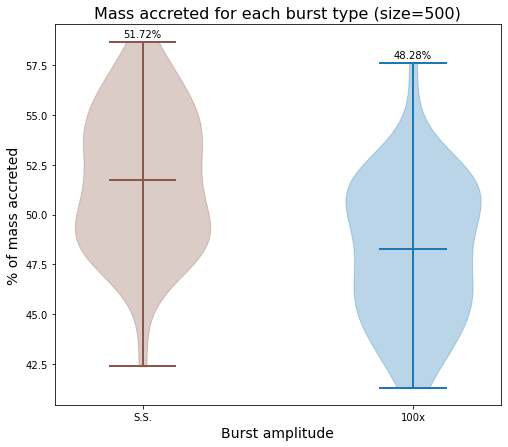

In [17]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(num100_total_500,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(num0_total_500,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(num0_total_500))
string100='{:.2f}%'.format(np.mean(num100_total_500))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(num0_total_500)+0.25,string0,ha='center')
ax1.text(2,np.max(num100_total_500)+0.25,string100,ha='center')
plt.title('Mass accreted for each burst type (size=500)',fontsize=16)
plt.show()    

## 1000 stars

In [8]:
burst1000=np.load('/home/lee/data/cluster_size_change/100x_burst/burst1000.npy')
L1000=np.load('/home/lee/data/cluster_size_change/100x_burst/L1000.npy')
C1000=np.load('/home/lee/data/cluster_size_change/100x_burst/C1000.npy')

In [9]:
num0_1000=0
num0_list_1000=[]
num100_1000=0
num100_list_1000=[]
stars1000=1000

for i in range(run):
    for j in range(stars1000):
        for k in range(steps):
            if C1000[i,j,k]==0:
                num0_1000+=1
            elif C1000[i,j,k]==100:
                num100_1000+=1
    num0_list_1000.append(num0_1000)
    num0_1000=0
    num100_list_1000.append(num100_1000)
    num100_1000=0

In [10]:
num100_final_1000=[]
for i in range(run):
    num100_final_1000.append(num100_list_1000[i]*100)
    
num0_final_1000=[]
for i in range(run):
    num0_final_1000.append(num0_list_1000[i]*1)

In [11]:
num100_total_1000=[]
num0_total_1000=[]
for i in range(run):
    total1_1000=num100_final_1000[i]+num0_final_1000[i]
    num100_total_1000.append(100*num100_final_1000[i]/total1_1000)
    num0_total_1000.append(100*num0_final_1000[i]/total1_1000)
    
print(num100_total_1000)

[50.57486451126562, 50.16726832412698, 49.83115168987645, 47.35835496416969, 48.20980116288436, 51.00081563221017, 49.59141964281752, 47.63613843108707, 46.92004479455523, 49.618314884561705, 55.97831740403268, 49.211571494249974, 44.37691503348593, 50.185451424899256, 47.900075235049705, 51.63009790652983, 47.860704491653046, 48.2073489014165, 49.20718829968256, 46.26744235329594, 50.49579278663955, 47.002635188357054, 45.50731259590762, 49.470208760827006, 53.60099290426785, 44.88138491130584, 45.72938099573228, 43.59738428810869, 41.47570982070364, 47.203828754999016, 47.204556309814095, 47.58203165449126, 45.30646591042298, 45.28189196103716, 48.05274826082605, 50.639027872850754, 51.8372655497598, 49.39700670058064, 50.0644193448787, 45.77465504608908, 54.472604748807115, 44.91382699668312, 52.64942785371101, 50.40971743622873, 46.299054644883874, 49.32829554995802, 47.65689204687354, 46.74522509268806, 49.901815479526554, 48.756171786946794]


/tmp/ipykernel_99801/3660752982.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


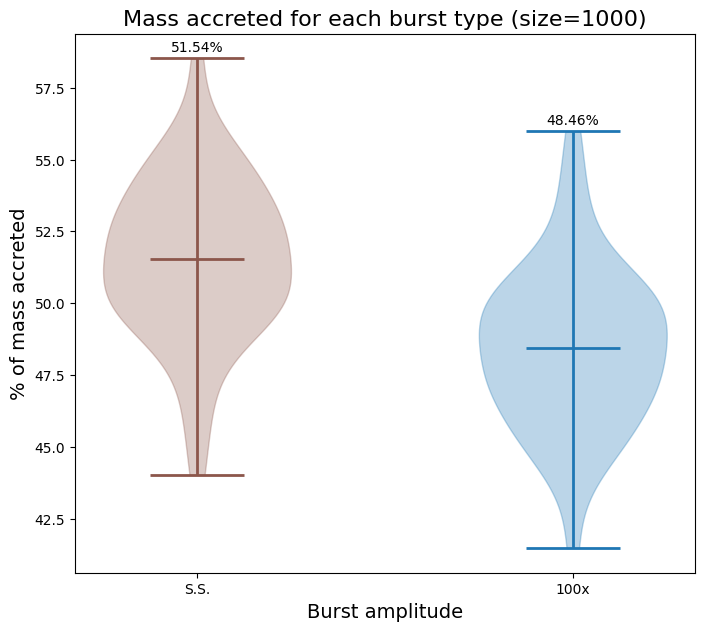

In [12]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(num100_total_1000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(num0_total_1000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(num0_total_1000))
string100='{:.2f}%'.format(np.mean(num100_total_1000))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(num0_total_1000)+0.25,string0,ha='center')
ax1.text(2,np.max(num100_total_1000)+0.25,string100,ha='center')
plt.title('Mass accreted for each burst type (size=1000)',fontsize=16)
plt.show()    

## 2000 stars

In [13]:
burst2000=np.load('/home/lee/data/cluster_size_change/100x_burst/burst2000.npy')
L2000=np.load('/home/lee/data/cluster_size_change/100x_burst/L2000.npy')
C2000=np.load('/home/lee/data/cluster_size_change/100x_burst/C2000.npy')

In [14]:
num0_2000=0
num0_list_2000=[]
num100_2000=0
num100_list_2000=[]
stars2000=2000

for i in range(run):
    for j in range(stars2000):
        for k in range(steps):
            if C2000[i,j,k]==0:
                num0_2000+=1
            elif C2000[i,j,k]==100:
                num100_2000+=1
    num0_list_2000.append(num0_2000)
    num0_2000=0
    num100_list_2000.append(num100_2000)
    num100_2000=0

In [15]:
num100_final_2000=[]
for i in range(run):
    num100_final_2000.append(num100_list_2000[i]*100)
    
num0_final_2000=[]
for i in range(run):
    num0_final_2000.append(num0_list_2000[i]*1)

In [16]:
num100_total_2000=[]
num0_total_2000=[]
for i in range(run):
    total1_2000=num100_final_2000[i]+num0_final_2000[i]
    num100_total_2000.append(100*num100_final_2000[i]/total1_2000)
    num0_total_2000.append(100*num0_final_2000[i]/total1_2000)
    
print(num100_total_2000)

[47.51397402424569, 50.69603110347684, 46.57653277990473, 47.63273759299413, 49.29907988133777, 50.84698928547189, 49.18998552430984, 49.50023163393914, 49.810079131150125, 47.60264815637478, 48.297407417703276, 48.91778253446763, 47.116379098057884, 45.989268588711525, 49.86486459730936, 47.29425831791322, 50.4298171963664, 48.08726035212135, 46.450024993813436, 47.18781756958557, 51.30394787192602, 44.446751358904834, 49.861906218405814, 51.75631453480925, 47.95442435751425, 48.88007747131018, 50.43817399425734, 49.2683173981227, 48.60304735366521, 47.02278560394513, 47.7556080859922, 49.2275807082934, 50.68250849975693, 47.40876412596361, 47.946111020075755, 46.5014079658308, 52.20381432111889, 51.204092205737666, 49.777613219026996, 49.04075419387232, 45.72726895421944, 49.19302213837262, 45.18944834440265, 47.808297105130144, 49.01596854794936, 48.33421652557654, 45.95596423935254, 44.73552684372672, 48.77400660901514, 47.56409131909375]


/tmp/ipykernel_99801/2831446789.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


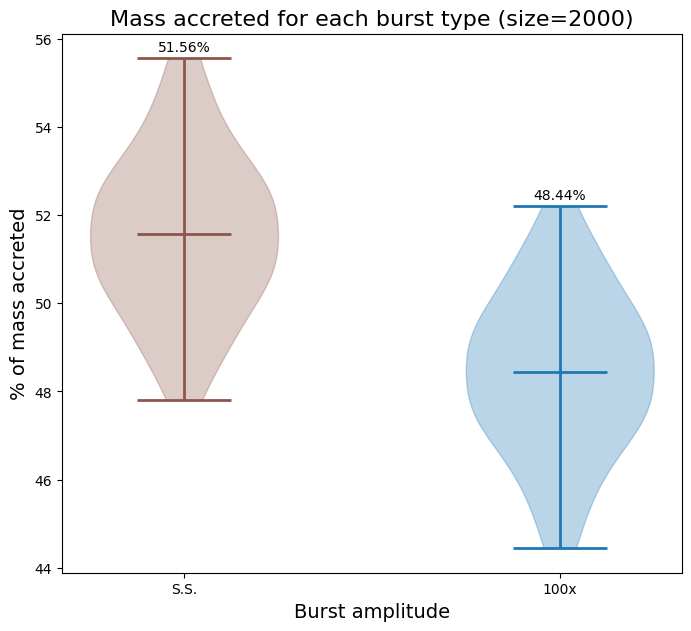

In [17]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(num100_total_2000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(num0_total_2000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(num0_total_2000))
string100='{:.2f}%'.format(np.mean(num100_total_2000))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(num0_total_2000)+0.15,string0,ha='center')
ax1.text(2,np.max(num100_total_2000)+0.15,string100,ha='center')
plt.title('Mass accreted for each burst type (size=2000)',fontsize=16)
plt.show()    

## 5000 stars

In [28]:
burst5000=np.load('/home/lee/data/cluster_size_change/100x_burst/burst5000.npy')
L5000=np.load('/home/lee/data/cluster_size_change/100x_burst/L5000.npy')
C5000=np.load('/home/lee/data/cluster_size_change/100x_burst/C5000.npy')

In [29]:
num0_5000=0
num0_list_5000=[]
num100_5000=0
num100_list_5000=[]
stars5000=5000

for i in range(run):
    for j in range(stars5000):
        for k in range(steps):
            if C5000[i,j,k]==0:
                num0_5000+=1
            elif C5000[i,j,k]==100:
                num100_5000+=1
    num0_list_5000.append(num0_5000)
    num0_5000=0
    num100_list_5000.append(num100_5000)
    num100_5000=0

In [30]:
num100_final_5000=[]
for i in range(run):
    num100_final_5000.append(num100_list_5000[i]*100)
    
num0_final_5000=[]
for i in range(run):
    num0_final_5000.append(num0_list_5000[i]*1)

In [31]:
num100_total_5000=[]
num0_total_5000=[]
for i in range(run):
    total1_5000=num100_final_5000[i]+num0_final_5000[i]
    num100_total_5000.append(100*num100_final_5000[i]/total1_5000)
    num0_total_5000.append(100*num0_final_5000[i]/total1_5000)
    
print(num100_total_5000)

[49.31869496175186, 48.75816165897364, 48.194803773319194, 48.63663934638075, 49.59806306017074, 48.223319543277995, 48.8626567187394, 47.90950136365526, 47.212339914917905, 48.79792729783587, 48.90553863726427, 44.83471335713568, 46.92960147934294, 47.60848959232252, 50.29938343787527, 49.04319752529832, 46.570388905138095, 50.53500747306474, 49.679967972366065, 49.46753836717348, 50.16798290574729, 46.90379067657316, 49.728457068161134, 50.39317541866445, 48.226470502166926, 49.057649203196476, 49.89918962470516, 47.07130465448276, 49.00094985432953, 48.988030917378936, 46.2690991418681, 46.711829654838255, 49.594475828027896, 50.33012662422788, 50.07413616057465, 51.44261193513592, 47.862124270991686, 48.41087925127348, 49.80546719555933, 50.42875632834341, 50.121818679787424, 49.960629489132714, 48.985242304824965, 50.41164770634613, 47.49753522459806, 49.13391297431464, 48.26914641912413, 48.995171123163615, 47.677129159445805, 47.414287109001926]


<ipython-input-32-c344cf92631d>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


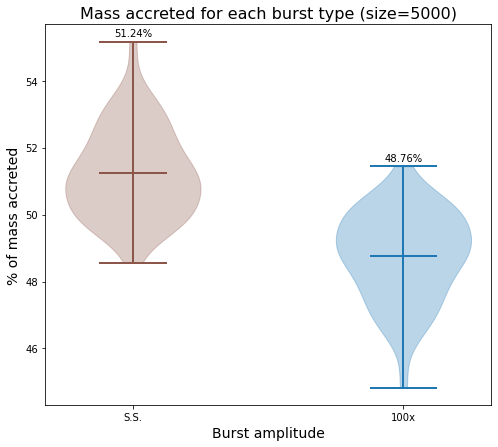

In [32]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(num100_total_5000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(num0_total_5000,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(num0_total_5000))
string100='{:.2f}%'.format(np.mean(num100_total_5000))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(num0_total_5000)+0.15,string0,ha='center')
ax1.text(2,np.max(num100_total_5000)+0.15,string100,ha='center')
plt.title('Mass accreted for each burst type (size=5000)',fontsize=16)
plt.show()    

In [33]:
#means and std
mean50=np.mean(num100_total_50)
std50=np.std(num100_total_50)
mean100=np.mean(num100_total_100)
std100=np.std(num100_total_100)
mean500=np.mean(num100_total_500)
std500=np.std(num100_total_500)
mean1000=np.mean(num100_total_1000)
std1000=np.std(num100_total_1000)
mean2000=np.mean(num100_total_2000)
std2000=np.std(num100_total_2000)
mean5000=np.mean(num100_total_5000)
std5000=np.std(num100_total_5000)

<ipython-input-44-c5ca3c4cc042>:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','50','100','500','1000','2000','5000'])


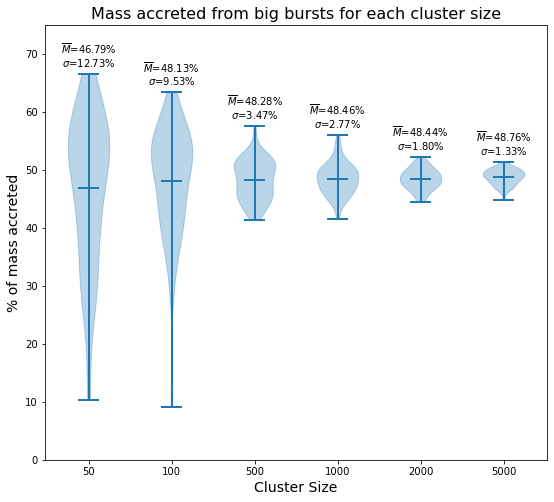

In [44]:
fig,ax1=plt.subplots()
fig.set_size_inches(9,8)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v50=ax1.violinplot(num100_total_50,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v50['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v50[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v100=ax1.violinplot(num100_total_100,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
v500=ax1.violinplot(num100_total_500,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v500['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v500[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
v1000=ax1.violinplot(num100_total_1000,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v1000['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v1000[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
v2000=ax1.violinplot(num100_total_2000,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v2000['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v2000[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
v5000=ax1.violinplot(num100_total_5000,positions=[6],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v5000['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v5000[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','50','100','500','1000','2000','5000'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Cluster Size',fontsize=14)

string50mean='{:.2f}%'.format(mean50)
string50std='{:.2f}%'.format(std50)
string100mean='{:.2f}%'.format(mean100)
string100std='{:.2f}%'.format(std100)
string500mean='{:.2f}%'.format(mean500)
string500std='{:.2f}%'.format(std500)
string1000mean='{:.2f}%'.format(mean1000)
string1000std='{:.2f}%'.format(std1000)
string2000mean='{:.2f}%'.format(mean2000)
string2000std='{:.2f}%'.format(std2000)
string5000mean='{:.2f}%'.format(mean5000)
string5000std='{:.2f}%'.format(std5000)

#ax1.locator_params(axis='x',nbins=2)
ax1.set_ylim(0,75)
ax1.text(1,np.max(num100_total_50)+3.5,'$\overline{M}$='+string50mean,ha='center')
ax1.text(1,np.max(num100_total_50)+1.25,'$\sigma$='+string50std,ha='center')
ax1.text(2,np.max(num100_total_100)+3.5,'$\overline{M}$='+string100mean,ha='center')
ax1.text(2,np.max(num100_total_100)+1.25,'$\sigma$='+string100std,ha='center')
ax1.text(3,np.max(num100_total_500)+3.5,'$\overline{M}$='+string500mean,ha='center')
ax1.text(3,np.max(num100_total_500)+1.25,'$\sigma$='+string500std,ha='center')
ax1.text(4,np.max(num100_total_1000)+3.5,'$\overline{M}$='+string1000mean,ha='center')
ax1.text(4,np.max(num100_total_1000)+1.25,'$\sigma$='+string1000std,ha='center')
ax1.text(5,np.max(num100_total_2000)+3.5,'$\overline{M}$='+string2000mean,ha='center')
ax1.text(5,np.max(num100_total_2000)+1.25,'$\sigma$='+string2000std,ha='center')
ax1.text(6,np.max(num100_total_5000)+3.5,'$\overline{M}$='+string5000mean,ha='center')
ax1.text(6,np.max(num100_total_5000)+1.25,'$\sigma$='+string5000std,ha='center')

plt.title('Mass accreted from big bursts for each cluster size',fontsize=16)
plt.savefig('/home/lee/research/figs/SizeChange/percent_mass_size_change_violinplot.jpeg',dpi=300,bbox_inches='tight')
plt.show()    


In [18]:
print('max=',np.max(num100_total_2000))
print('min=',np.min(num100_total_2000))
print('mean=',np.mean(num100_total_2000))
error2000up=(np.max(num100_total_2000)-np.mean(num100_total_2000))/((np.max(num100_total_2000)+np.mean(num100_total_2000))/2)
error2000down=(np.mean(num100_total_2000)-np.min(num100_total_2000))/((np.min(num100_total_2000)+np.mean(num100_total_2000))/2)
print(error2000up)
print(error2000down)
avg2000=(error2000up+error2000down)/2
print(avg2000*100)

max= 52.20381432111889
min= 44.446751358904834
mean= 48.43769961829244
0.07484217109638758
0.08593361358980026
8.038789234309391


In [19]:
print('max=',np.max(num100_total_1000))
print('min=',np.min(num100_total_1000))
print('mean=',np.mean(num100_total_1000))
print(np.max(num100_total_1000)/np.mean(num100_total_1000))
error1000up=(np.max(num100_total_1000)-np.mean(num100_total_1000))/((np.max(num100_total_1000)+np.mean(num100_total_1000))/2)
print(error1000up)
error1000down=(np.mean(num100_total_1000)-np.min(num100_total_1000))/((np.min(num100_total_1000)+np.mean(num100_total_1000))/2)
print(error1000down)
avg1000=(error1000up+error1000down)/2
print(avg1000*100)

max= 55.97831740403268
min= 41.47570982070364
mean= 48.45942035671513
1.1551586253399262
0.14398812552876794
0.15530550791964007
14.964681672420399
